<a href="https://colab.research.google.com/github/pjs102793/gachon_edu/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instance Segmentation

이 튜토리얼에서는 아래의 내용을 학습합니다.
- Instance Segmentation이란?
- MMDetection이란?
- MMDetection 설치
- MMDetection detector로 추론 수행
- 모델 훈련



## Instance Segmentation이란?

![전체적인 Task](https://blog.kakaocdn.net/dn/bAmtqx/btq4f0vR6mp/lzThOlW2XQtMoHq5urHri1/img.jpg)

Instance segmentation은 컴퓨터 비전의 한 분야로, 이미지에서 각 객체를 개별적으로 구분하면서 해당 객체의 픽셀 수준의 경계를 동시에 식별하는 과정입니다. 다시 말해, 객체를 구분하면서 해당 객체의 형태와 위치도 동시에 파악합니다.

간단한 예로, 사진 속에 양과 개가 있을 때, instance segmentation을 수행하면 각 객체를 개별적으로 구분하면서 해당 객체의 정확한 픽셀 수준의 형태도 동시에 식별하게 됩니다.

여기서 주요 개념들을 좀 더 자세히 알아보겠습니다.

1. Image Classification (이미지 분류): 이미지가 어떤 카테고리에 속하는지 결정합니다. 예: '이 사진은 양(0.6)과 개(0.3)입니다'와 같은 분류

2. Object Detection (객체 탐지): 이미지 내에서 객체의 위치를 사각형 bounding box로 찾아내고, 해당 객체의 카테고리도 함께 식별합니다. 예: '이 사진에는 양과 개가 있고, 여기에 위치해 있습니다'와 같은 정보 제공.

3. Semantic Segmentation (시멘틱 분할): 이미지의 모든 픽셀에 대해 카테고리 라벨을 할당합니다. 이 때, 같은 카테고리에 속하는 여러 객체는 구분하지 않고 동일한 라벨로 처리됩니다. 예: 양들이 여러 마리 있는 사진에서 모든 양들의 픽셀은 '양' 라벨로 표시됩니다. 또한 개도 따로 픽셀이 지정됩니다.

4. Instance Segmentation (인스턴스 분할): Semantic Segmentation과 비슷하지만, 같은 카테고리의 객체도 개별적으로 구분합니다. 예: 양들이 여러 명 있는 사진에서 각각의 양이 개별적으로 구분되어 표시됩니다.

Instance segmentation을 실제로 구현하기 위해서는 딥러닝 기반의 모델이 일반적으로 사용됩니다.
그리고 저희 Piece Picking 작업에 핵심적으로 들어가는 딥러닝 모델이 Instance segmentation 모델입니다.

Instance segmentation 모델은 종류가 굉장히 많고, 꾸준히 연구되고 있는 분야입니다. 그 중에서 제일 보편적이고 성능이 좋은 Mask-RCNN으로 실습을 진행 할 것입니다.

## Mask RCNN

![기본적인 Mask RCNN](https://velog.velcdn.com/images%2Fsksmslhy%2Fpost%2F5a2f9606-410a-40bd-b619-bd14203d89c6%2F%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-09-03%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%201.00.34.png)

Mask R-CNN은 Instance Segmentation 분야에서 보편적으로 사용되고 있는 모델입니다. 이름에서 'Mask'는 객체의 모양을 표현하는 마스크 생성을 의미하며, 'R-CNN'은 'Region-based Convolutional Neural Networks'의 약자로, 객체의 위치를 탐지하는 기능을 가진 모델입니다.

![Mask RCNN](https://d2908q01vomqb2.cloudfront.net/f1f836cb4ea6efb2a0b1b99f41ad8b103eff4b59/2021/12/01/ML-6187-image003.png)

Mask R-CNN의 주요 특징 및 작동 원리는 다음과 같습니다.

1. Backbone Architecture: Mask R-CNN은 이미지의 특징을 추출하기 위해 ResNet과 같은 깊은 합성곱 신경망(Convolutional Neural Network, CNN)을 사용합니다.
2. Feature Pyramid Network (FPN): Backbone에서 추출된 특징 맵들을 통합하고 확장하여 다양한 스케일의 객체를 감지할 수 있도록 도와줍니다. FPN은 여러 레벨의 특징 맵을 생성하며, 각 레벨은 다양한 크기의 객체 탐지에 특화되어 있습니다.
3. Region Proposal Network (RPN): RPN은 이미지에서 가능한 객체의 위치를 '제안'합니다. 이 제안된 영역들은 후속 단계에서 분석됩니다.
4. RoI Align: 제안된 영역들의 크기를 고정시키기 위해 RoI라는 기술을 사용합니다. 사진에서 보이는 FC Layers와 Conv에 넣으려면, 고정된 크기가 필요하기 때문입니다.
5. Box Head, Mask Head (분류, 위치 조정 및 마스킹): RoI Align 후, 네트워크는 각 제안된 영역에 대해 객체의 종류를 분류하고, bounding box의 위치를 조정하며, 해당 객체의 픽셀 수준의 마스크를 생성합니다.

위의 과정을 통해, 이미지에서 **Box(물체의 위치), Class(물체가 무엇인지), Score(물체가 어느정도 확실한지), Mask(물체의 경계선)**이 출력이 됩니다.

Instance Segmentation 모델의 대부분은 위의 구조를 가지며, 흔히 위의 구조를 Backbone + Neck + Head 라고 합니다.

Backbone, Neck, Head에 대해서는 다음과 같습니다.

- Backbone은 위에서 설명한 대로,이미지로부터 기본적인 특징을 추출합니다.
- Neck은 Backbone에서 추출된 특징을 더욱 개선하거나 활용 가능한 형태로 변환합니다. 위에서는 FPN에 해당합니다.
- Head는 특정 작업(예: 객체 탐지, 분류, 세그멘테이션)을 수행하기 위한 최종 출력을 생성합니다. 위에서는 RPN, RoiAlign, Box Head, Mask Head에 해당합니다.

많은 연구원들은 Backbone, Neck, 그리고 Head에 대해 각 부분의 성능을 향상시키기 위한 연구를 지속적으로 수행하며, 이를 통해 더욱 향상된 모델 구조를 개발하고 있습니다.

하지만 이러한 다양한 구조와 기술을 효과적으로 테스트하고 적용하는 것은 매우 복잡하고 시간 소모적일 수 있습니다. 이러한 문제를 해결하기 위해 **mmdetection**과 같은 프레임워크가 등장하였습니다.

## MMDetection이란?



![MMDetection](https://github.com/open-mmlab/mmdetection/raw/main/resources/mmdet-logo.png)
mmdetection은 다양한 최신 객체 탐지 모델과 그들의 Backbone, Neck, Head 구성 요소를 모듈화하여 연구자들이 쉽게 접근하고 실험을 진행할 수 있도록 지원합니다.

이를 통해 연구원들은 개별 구성 요소에 집중하여 성능을 최적화할 수 있고, 여러 방법론과 아키텍처 간의 비교도 보다 간편하게 수행할 수 있습니다.

mmdetection에는 Mask RCNN 뿐만 아니라, SOLOv2, BoxInst과 같은 최신 모델도 지원합니다. Backbone도 ResNet 뿐 만 아니라 RegNet, ConvNeXt, Swin Transformer와 같은 최신 Backbone도 지원합니다.

아래 실습에서는 대표적으로 사용되는 ResNet50 Backbone을 사용한 Mask RCNN을 사용합니다.

## MMDetection 설치

In [ ]:
# nvcc version 확인
!nvcc -V
# GCC version 확인
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# MMDetection에 필요한 종속성 설치
!pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 25.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.5/437.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 28.4 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 8.0 MB/s eta 0:00:00


In [ ]:
# MMDetection 설치
!mim install mmdet

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.9 MB/s eta 0:00:00


In [ ]:
# Pytorch가 설치되어 있는 지 확인
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# MMDetection이 설치되어 있는 지 확인
import mmdet
print(mmdet.__version__)

# mmcv가 설치되어 있는 지 확인
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

2.0.1+cu118 True
3.1.0


ModuleNotFoundError: ignored

## MMDet Detector로 추론 수행



In [ ]:
# Mask R-CNN Config 파일과 체크포인트 설치
!mim download mmdet --config mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco --dest ./checkpoints

processing mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 MiB 33.3 MB/s eta 0:00:00
Successfully downloaded mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth to /content/checkpoints
Successfully dumped mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco.py to /content/checkpoints


In [ ]:

import mmcv
import mmengine
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
# Config 파일을 설정하여 detector를 초기화합니다.
config_file = 'checkpoints/mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco.py'
# 로드 할 체크포인트 파일 설정
checkpoint_file = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

# MMDetection의 모든 모듈을 레지스트리에 등록
register_all_modules()

# Config 파일과 체크포인트 파일을 불러와 모델을 빌드
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cuda:0'

model

Loads checkpoint by local backend from path: checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth


MaskRCNN(
  (data_preprocessor): DetDataPreprocessor()
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)

이 모델은 Backbone으로 ResNet50을 사용하며, RPN 헤드와 RoI 헤드가 있습니다. 또한 이 모델에는 Backbone 바로 뒤에 neck이라는 이름의 신경망 모듈이 있습니다. 멀티 스케일 기능을 향상시키기 위한 [Feature Pyramid Network(FPN)](https://arxiv.org/abs/1612.03144)입니다.


### Detector로 추론 수행

모델이 성공적으로 생성되고 로드되었으니 얼마나 좋은지 살펴봅시다. 여기서는 MMDetection에 구현된 API `inference_detector`를 사용합니다. 이 API는 추론 프로세스를 쉽게 하기 위해 만들어졌습니다. 자세한 코드 내용은 [여기](https://github.com/open-mmlab/mmdetection/blob/master/mmdet/apis/inference.py#L99)에서 확인할 수 있습니다.

In [ ]:
!mkdir demo
!wget https://raw.githubusercontent.com/open-mmlab/mmdetection/main/demo/demo.jpg -O demo/demo.jpg

--2023-10-06 00:46:11--  https://raw.githubusercontent.com/open-mmlab/mmdetection/main/demo/demo.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 259865 (254K) [image/jpeg]
Saving to: ‘demo/demo.jpg’

demo/demo.jpg       100%[===================>] 253.77K  --.-KB/s    in 0.04s   

2023-10-06 00:46:12 (6.59 MB/s) - ‘demo/demo.jpg’ saved [259865/259865]



In [ ]:
# detector를 사용하여 추론 수행
image = mmcv.imread('demo/demo.jpg', channel_order='rgb')
result = inference_detector(model, image)

result

<DetDataSample(

    META INFORMATION
    img_id: 0
    ori_shape: (427, 640)
    scale_factor: (1.8734375, 1.873536299765808)
    img_shape: (800, 1199)
    pad_shape: (800, 1216)
    img_path: None
    batch_input_shape: (800, 1216)

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([[219.8702, 177.0791, 458.3700, 382.1367],
                        [480.5608, 110.4768, 523.1904, 130.3331],
                        [167.2974, 108.4704, 219.3721, 139.7081],
                        [432.7696, 104.8358, 482.8209, 132.2976],
                        [293.9358, 116.1538, 381.3969, 150.1965],
                        [189.7066, 107.6951, 296.3842, 154.8887],
                        [608.6334, 111.2579, 635.6981, 136.8759],
                        [  0.0000, 112.1323,  64.1121, 145.1977],
                        [396.6710, 110.8235, 434.0617, 133.4602],
                        [558.0748, 109.3840,

In [ ]:
from mmdet.registry import VISUALIZERS
# visualizer 초기화(블록을 한 번만 실행할 것)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# 체크포인트에서 dataset_meta가 로드되고 를 init_detector의 모델에 전달.
visualizer.dataset_meta = model.dataset_meta

model.dataset_meta

/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


{'classes': ('person',
  'bicycle',
  'car',
  'motorcycle',
  'airplane',
  'bus',
  'train',
  'truck',
  'boat',
  'traffic light',
  'fire hydrant',
  'stop sign',
  'parking meter',
  'bench',
  'bird',
  'cat',
  'dog',
  'horse',
  'sheep',
  'cow',
  'elephant',
  'bear',
  'zebra',
  'giraffe',
  'backpack',
  'umbrella',
  'handbag',
  'tie',
  'suitcase',
  'frisbee',
  'skis',
  'snowboard',
  'sports ball',
  'kite',
  'baseball bat',
  'baseball glove',
  'skateboard',
  'surfboard',
  'tennis racket',
  'bottle',
  'wine glass',
  'cup',
  'fork',
  'knife',
  'spoon',
  'bowl',
  'banana',
  'apple',
  'sandwich',
  'orange',
  'broccoli',
  'carrot',
  'hot dog',
  'pizza',
  'donut',
  'cake',
  'chair',
  'couch',
  'potted plant',
  'bed',
  'dining table',
  'toilet',
  'tv',
  'laptop',
  'mouse',
  'remote',
  'keyboard',
  'cell phone',
  'microwave',
  'oven',
  'toaster',
  'sink',
  'refrigerator',
  'book',
  'clock',
  'vase',
  'scissors',
  'teddy bear',


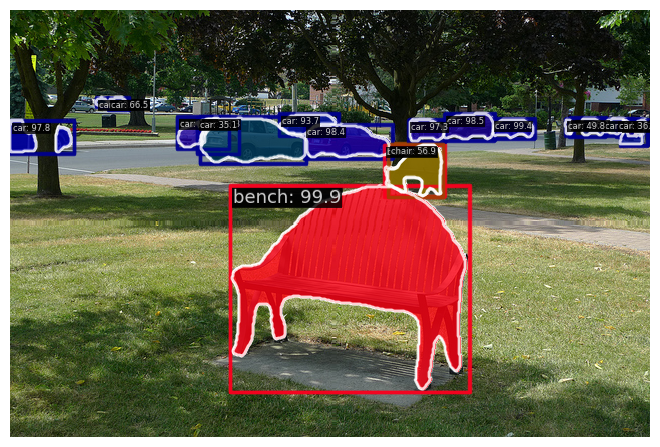

In [ ]:
# 결과 확인
visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = False,
    wait_time=0,
)
visualizer.show()


## 모델 훈련

MMDetection으로 모델을 학습하는 법에 대해 간단히 알아봅니다.
1. COCO Annotation
2. config를 수정하기
3. 모델 학습



### COCO Annotation

MMDetection에서 Dataset을 지원하는 방법에는 세 가지가 있습니다:
  1. Dataset을 COCO format으로 재구성합니다.
  2. Dataset을 middle format로 재구성합니다.
  3. 새 Dataset을 구현합니다.

일반적으로 세 번째 방법보다 앞의 두 가지 방법이 더 쉽기 때문에 권장합니다.

이 튜토리얼에서는 첫번째 방법인 COCO Annotation 형태를 가진 Dataset으로 학습을 진행합니다.

In [ ]:
# 데이터셋 다운로드
!git clone https://github.com/chongruo/tiny-coco.git

Cloning into 'tiny-coco'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 29 (delta 0), reused 6 (delta 0), pack-reused 23
Receiving objects: 100% (29/29), 2.23 MiB | 12.40 MiB/s, done.


In [ ]:
# 데이터셋 디렉토리 확인

# tree 설치
!apt-get -q install tree
!tree tiny-coco/

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (258 kB/s)
Selecting previously unselected package tree.
(Reading database ... 120879 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
tiny-coco/
├── create_small_dataset.py
├── README.md
└── small_coco
    ├── instances_train2017_small.json
    └── train_2017_small
        ├── 000000005802.jpg
        ├── 000000060623.jpg
        ├── 000000118113.jpg
        ├── 000000184613.jpg
        ├── 000000193271.jpg
        ├── 000000222564.j

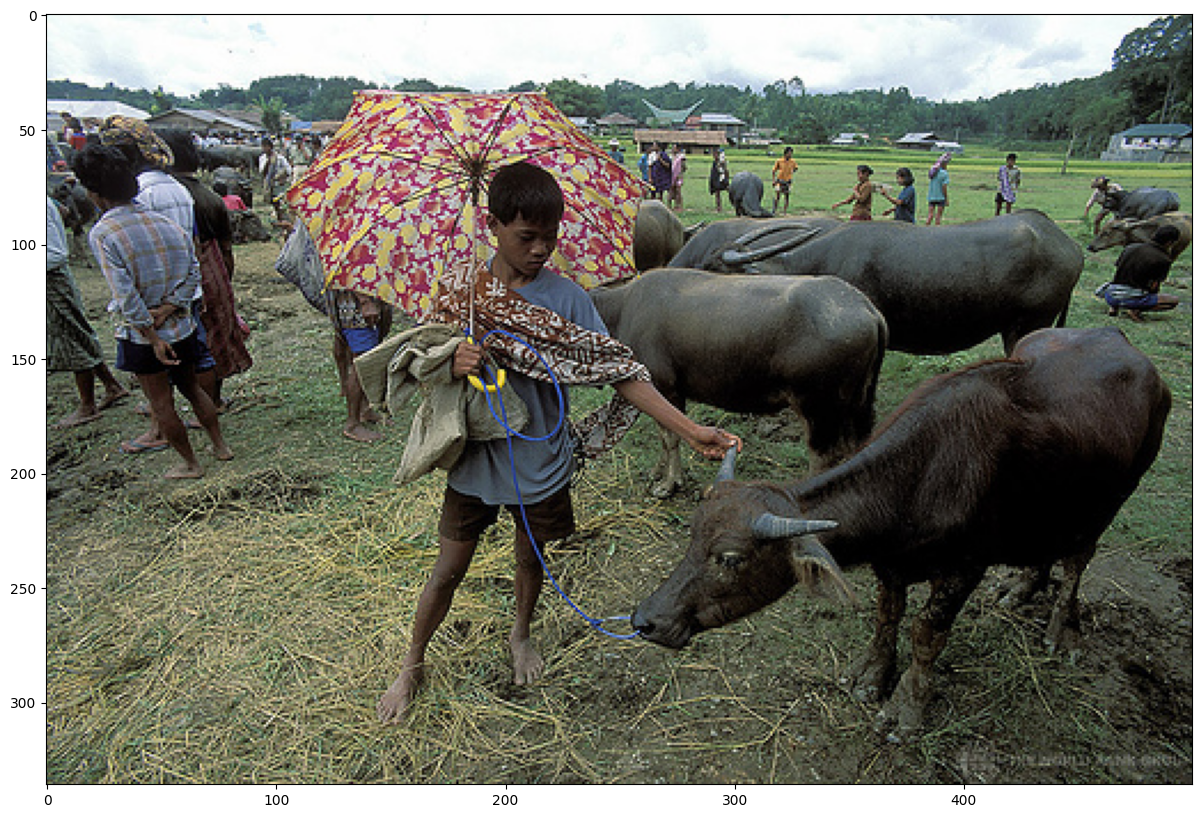

In [ ]:
# 데이터셋 이미지 확인
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('./tiny-coco/small_coco/train_2017_small/000000184613.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [ ]:
# annotation 확인
!cat tiny-coco/small_coco/instances_train2017_small.json

{"info": {"description": "COCO 2017 Dataset", "url": "http://cocodataset.org", "version": "1.0", "year": 2017, "contributor": "COCO Consortium", "date_created": "2017/09/01"}, "licenses": [{"url": "http://creativecommons.org/licenses/by-nc-sa/2.0/", "id": 1, "name": "Attribution-NonCommercial-ShareAlike License"}, {"url": "http://creativecommons.org/licenses/by-nc/2.0/", "id": 2, "name": "Attribution-NonCommercial License"}, {"url": "http://creativecommons.org/licenses/by-nc-nd/2.0/", "id": 3, "name": "Attribution-NonCommercial-NoDerivs License"}, {"url": "http://creativecommons.org/licenses/by/2.0/", "id": 4, "name": "Attribution License"}, {"url": "http://creativecommons.org/licenses/by-sa/2.0/", "id": 5, "name": "Attribution-ShareAlike License"}, {"url": "http://creativecommons.org/licenses/by-nd/2.0/", "id": 6, "name": "Attribution-NoDerivs License"}, {"url": "http://flickr.com/commons/usage/", "id": 7, "name": "No known copyright restrictions"}, {"url": "http://www.usa.gov/copyrig

COCO Dataset의 annotation 형식은 대표적인 Object Detection과 Image Segmentation에 널리 사용됩니다.

images: 각 이미지에 대한 정보를 포함하며, 여기에는 이미지의 파일명, 높이, 너비 및 고유한 ID가 포함됩니다.

annotations: 각 객체 annotation에 대한 정보가 포함되어 있으며, 여기에는 image_id, category_id 및 bbox 정보, segmentation 정보가 포함됩니다.

categories: 데이터셋 내의 각 객체 클래스에 대한 정보가 포함됩니다.


```python
{
    "info": {...},
    "licenses": [...],
    "images": [
        {
            "file_name": "a.jpg",
            "height": 720,
            "width": 1280,
            "id": 1,
            ...
        },
        ...
    ],
    "annotations": [
        {
            "id": 1,
            "image_id": 1,
            "category_id": <category_id>,
            "bbox": [<x1>, <y1>, <width>, <height>],
            "segmentation": [[x1, y1, x2, y2, ..., xn, yn]],
            ...
        },
        ...
    ],
    "categories": [
        {
            "id": 1,
            "name": "unoccluded",
        },
        ...
    ]
}
```

### config 수정하기

다음 단계에서는 학습을 위한 config을 수정해야 합니다.
빠르게 학습하기 위해 미리 학습된 모델을 사용하여 모델을 미세 조정(fine-tune)합니다.

mmdetection의 dataset에 관한 것은 기본적으로 COCO Dataset 형태로 미리 세팅되어 있으니 경로 위치만 잘 설정해주면 됩니다.

In [ ]:
from mmengine import Config
cfg = Config.fromfile('./checkpoints/mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco.py')

In [ ]:
cfg

Config (path: ./checkpoints/mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco.py): {'auto_scale_lr': {'base_batch_size': 16, 'enable': False}, 'backend_args': None, 'data_root': 'data/coco/', 'dataset_type': 'CocoDataset', 'default_hooks': {'checkpoint': {'interval': 1, 'type': 'CheckpointHook'}, 'logger': {'interval': 50, 'type': 'LoggerHook'}, 'param_scheduler': {'type': 'ParamSchedulerHook'}, 'sampler_seed': {'type': 'DistSamplerSeedHook'}, 'timer': {'type': 'IterTimerHook'}, 'visualization': {'type': 'DetVisualizationHook'}}, 'default_scope': 'mmdet', 'env_cfg': {'cudnn_benchmark': False, 'dist_cfg': {'backend': 'nccl'}, 'mp_cfg': {'mp_start_method': 'fork', 'opencv_num_threads': 0}}, 'load_from': None, 'log_level': 'INFO', 'log_processor': {'by_epoch': True, 'type': 'LogProcessor', 'window_size': 50}, 'model': {'backbone': {'depth': 50, 'frozen_stages': 1, 'init_cfg': {'checkpoint': 'open-mmlab://detectron2/resnet50_caffe', 'type': 'Pretrained'}, 'norm_cfg': {'requires_grad': False, 'type':

Dataset의 경로, Training 스케쥴, 런타임 설정을 수정합니다. 자세한 내용은 아래 주석을 참고하시기 바랍니다.

In [ ]:
from mmengine.runner import set_random_seed

# dataset의 경로를 설정합니다.
cfg.data_root = './tiny-coco/small_coco'

cfg.train_dataloader.dataset.ann_file = 'instances_train2017_small.json'
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix.img = 'train_2017_small/'

cfg.val_dataloader.dataset.ann_file = 'instances_train2017_small.json'
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix.img = 'train_2017_small/'

cfg.test_dataloader = cfg.val_dataloader

# validation에 필요한 annotation 경로를 추가합니다.
cfg.val_evaluator.ann_file = cfg.data_root+'/'+'instances_train2017_small.json'
cfg.test_evaluator = cfg.val_evaluator

# 클래스 개수를 설정합니다. COCO Dataset은 80개의 클래스를 학습합니다.
cfg.model.roi_head.bbox_head.num_classes = 80
cfg.model.roi_head.mask_head.num_classes = 80

# 빠르게 학습하기 위해 기존에 학습되어 있는 모델을 불러와 Fine-tune을 합니다.
cfg.load_from = './checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

# 모델의 가중치, 최종 config 파일 및 log를 저장할 디렉토리를 설정합니다.
cfg.work_dir = './tutorial_exps'

# validation의 주기를 설정합니다.
cfg.train_cfg.val_interval = 6
# 학습된 가중치 저장 주기를 설정합니다.
cfg.default_hooks.checkpoint.interval = 6

# 기본이 8개의 GPU에 학습되는 것으로 세팅되어 있기 때문에
# 1개의 GPU를 사용하는 환경에서의 lr을 줄여줍니다.
cfg.optim_wrapper.optimizer.lr = 0.02 / 8
cfg.default_hooks.logger.interval = 10

# 일관된 학습 상태를 유지하기 위해 seed를 고정합니다.
# cfg.seed = 0
set_random_seed(0, deterministic=False)

# Tensorboard로 결과를 보기 위해 visualizer를 추가합니다.
cfg.visualizer.vis_backends.append({"type":'TensorboardVisBackend'})
# cfg.vis_backends.append({"type":'TensorboardVisBackend'})

### 모델 학습

config를 수정 완료하였으면, mmengine의 Runner를 사용하여 수정된 config 파일을 넣고 train 합니다. Runner.from_cfg에 config를 넣으면 학습하기 전에 미리 어떤 학습 환경을 가지고 있는지 모두 출력합니다.

In [ ]:
from mmengine.runner import Runner

# config를 통해 runner를 빌드함
runner = Runner.from_cfg(cfg)

10/06 02:12:27 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
    CUDA available: True
    numpy_random_seed: 209652396
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


10/06 02:12:27 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
10/06 02:12:27 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

In [ ]:
# 학습을 시작합니다.
runner.train()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
10/06 02:12:50 - mmengine - INFO - load model from: open-mmlab://detectron2/resnet50_caffe
10/06 02:12:50 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://detectron2/resnet50_caffe


Downloading: "https://download.openmmlab.com/pretrain/third_party/resnet50_msra-5891d200.pth" to /root/.cache/torch/hub/checkpoints/resnet50_msra-5891d200.pth


10/06 02:12:55 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: conv1.bias

Loads checkpoint by local backend from path: ./checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
10/06 02:12:55 - mmengine - INFO - Load checkpoint from ./checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
10/06 02:12:55 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
10/06 02:12:55 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
10/06 02:12:55 - mmengine - INFO - Checkpoints will be saved to /content/tutorial_exps.
10/06 02:13:00 - mmengine - INFO - Exp name: mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco_20231006_021226
10/06 02:13:00 - mmengine -

MaskRCNN(
  (data_preprocessor): DetDataPreprocessor()
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)

## 훈련된 모델 테스트하기

모델을 미세 조정한 후 예측 결과를 시각화해 보겠습니다.

In [ ]:
import mmcv
from mmdet.apis import init_detector, inference_detector
img = mmcv.imread('./tiny-coco/small_coco/train_2017_small/000000184613.jpg',channel_order='rgb')
checkpoint_file = './tutorial_exps/epoch_36.pth'
model = init_detector(cfg, checkpoint_file, device='cuda:0')
new_result = inference_detector(model, img)
print(new_result)

Loads checkpoint by local backend from path: ./tutorial_exps/epoch_36.pth
<DetDataSample(

    META INFORMATION
    img_id: 0
    ori_shape: (336, 500)
    scale_factor: (2.38, 2.380952380952381)
    img_shape: (800, 1190)
    pad_shape: (800, 1216)
    img_path: None
    batch_input_shape: (800, 1216)

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([[145.6125,  66.0391, 306.2690, 308.7403],
                        [ 12.5454,  54.2342,  81.0945, 205.3809],
                        [105.1336,  31.9512, 261.3674, 168.8867],
                        [238.9747, 108.6117, 369.2372, 207.4993],
                        [286.2491,  85.1822, 452.8697, 150.1534],
                        [242.4415, 128.6453, 498.9756, 322.2924],
                        [316.2526,  57.3195, 328.3749,  88.1632],
                        [413.4176,  60.4651, 424.1557,  88.8333],
                        [  1.0669,  76.25

In [ ]:
from mmengine.visualization import Visualizer
# get built visualizer
visualizer_now = Visualizer.get_current_instance()
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer_now.dataset_meta = model.dataset_meta
# show the results
visualizer_now.add_datasample(
    'new_result',
    img,
    data_sample=new_result,
    draw_gt=False,
    wait_time=0,
    out_file=None,
    pred_score_thr=0.9
)
visualizer_now.show()

## 추론 서버에 등록

tutorial_exps에 config 파일(이름 수정 필요)이 여기서 최종적으로 학습된 모델의 설정이며 last_checkpoint.pth는 최종적으로 학습된 모델입니다.

이 파일 두개를 다운로드 받아서 Inference Server에 model_zoo/mask_rcnn/mask_rcnn/checkpoints 폴더에 config 파일은 config.py라는 이름으로 저장하고, last_checkpoint.pth는 model.pth라는 이름으로 저장하면 됩니다.